<a href="https://colab.research.google.com/github/msfasha/normalize_ranges/blob/main/normalize_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data file

In [ ]:
import pandas as pd
df = pd.read_csv("nrw_results.csv")


print(df.head(5))

Examine content

---



In [ ]:
print(df.dtypes)
print(df.info)

Define linear normalize function

In [47]:
def normalize_linear(OldMin, OldMax, NewMin, NewMax, OldValue): 
  NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
  return NewValue



Normalize the required values

In [55]:

subno = df["subscribers_no"]
subno_min = subno.min()
subno_max = subno.max()

result = [normalize_linear(subno_min, subno_max, 0, 1000,x) for x in df['subscribers_no']]
del df['subscribers_no']
#df["subscribers_no"] = result
df.insert(1,"subscribers_no", result)

annual_water_savings_m3 = df["annual_water_savings_m3"]
annual_water_savings_m3_min = annual_water_savings_m3.min()
annual_water_savings_m3_max = annual_water_savings_m3.max()

result = [normalize_linear(annual_water_savings_m3_min, annual_water_savings_m3_max, 0, 1000,x) for x in df['annual_water_savings_m3']]
del df['annual_water_savings_m3']
#df["annual_water_savings_m3"] = result
df.insert(2,"annual_water_savings_m3", result)

# for index, row in df.iterrows():
#   row["subscribers_no"] = normalize_linear(subno_min, subno_max, 0, 1000,
#                                            row["subscribers_no"])
  
# df


TypeError: ignored

<BarContainer object of 4 artists>

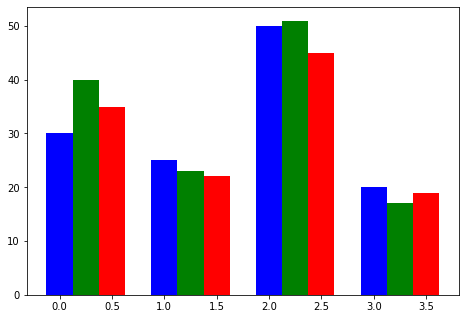

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [24]:
var = normalize_linear(0,10,0,1000, 5)
print(var)

500.0
